# **机器学习与药物发现（2）探索性数据分析**

## **安装 conda 和 rdkit**

In [41]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

/bin/bash: wget: command not found
PREFIX=/usr/local
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 370: md5sum: command not found
tail: stdout: Broken pipe
expected: 6e267728e74a7089e59c7d8c59d20e6b
     got: 
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 392: /usr/local/conda.exe: Permission denied
chmod: /usr/local/conda.exe: No such file or directory
Unpacking payload ...
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 404: /usr/local/conda.exe: No such file or directory
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 406: /usr/local/conda.exe: No such file or directory
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::ipython==8.4.0=py39hecd8cb5_0
  - defaults/osx-64::anaconda-client==1.10.0=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.3.5=pyhd3eb1b0_0
  - defaults/noarch::backports.functools_lru_cache==1.6.4=pyhd3eb1b0_0
  - defaults/osx-64::jupyterlab==3.4.4=

## **导入数据**

In [42]:
import pandas as pd

In [44]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active


In [45]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [46]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [47]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.00,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
5819,CHEMBL4859103,2.57,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...
5820,CHEMBL4863615,2.39,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...
5821,CHEMBL4854913,0.41,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...
5822,CHEMBL4848527,0.63,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...


## **计算利平斯基五原则**
辉瑞公司的科学家Christopher Lipinski提出了一套评估化合物的药物亲和力的经验法则。这种药物亲和力是基于吸收、分布、代谢和排泄（ADME），也被称为药代动力学特征。利宾斯基分析了所有经FDA批准的口服活性药物，制定了所谓的五项规则或**利宾斯基规则**。

利平斯基五原则：

    分子量小于500     （MW）
    氢键给体数目小于5
    氢键受体数目小于10
    脂水分配系数小于5 （LogP）

### **导入数据库**

In [48]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **计算五原则**

In [49]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) # 通过smiles分子式建造分子
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [50]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5819,562.154,7.8680,4.0,5.0
5820,506.094,7.3886,3.0,4.0
5821,523.121,5.9852,2.0,4.0
5822,547.143,7.0315,3.0,4.0


### **合并数据框**

In [51]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5819,562.154,7.8680,4.0,5.0
5820,506.094,7.3886,3.0,4.0
5821,523.121,5.9852,2.0,4.0
5822,547.143,7.0315,3.0,4.0


In [52]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active


合并两个数据框

In [53]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [54]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active,562.154,7.8680,4.0,5.0
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active,506.094,7.3886,3.0,4.0
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active,523.121,5.9852,2.0,4.0
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active,547.143,7.0315,3.0,4.0


### **将IC50转化为pIC50**

为了让**IC50**数据分布更均匀，我们将把**IC50**转换为负对数尺度，**-log10（IC50）**。

这个自定义函数pIC50()将接受一个数据框作为输入，并将
* 从 "standard_value"列中获取IC50值，并通过乘以10$^{-9}$将其从nM转换为M。
* 取摩尔值并应用-log10
* 删除 "standard_value"列并创建一个新的 "pIC50 "列

In [55]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) 
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

要注意的是：大于100,000,000的值将被固定为100,000,000，否则负对数值将变成负数。

In [56]:
df_combined.standard_value.describe()

count    5.824000e+03
mean     2.588482e+12
std      1.068126e+14
min      0.000000e+00
25%      1.470000e+02
50%      2.400000e+03
75%      1.700000e+04
max      5.888437e+15
Name: standard_value, dtype: float64

In [57]:
-np.log10( (10**-9)* 100000000 )

1.0

In [58]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [59]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

我们将首先应用norm_value()函数，使standard_value列中的数值被规范化。

In [60]:
df_norm = norm_value(df_combined)
df_norm

/var/folders/hj/xz5cqr414qxby0l8k0yb49c80000gn/T/ipykernel_5768/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.00
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,active,562.154,7.8680,4.0,5.0,2.57
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,active,506.094,7.3886,3.0,4.0,2.39
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,active,523.121,5.9852,2.0,4.0,0.41
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,active,547.143,7.0315,3.0,4.0,0.63


In [61]:
df_norm.standard_value_norm.describe()

count    5.824000e+03
mean     2.795865e+05
std      4.242714e+06
min      0.000000e+00
25%      1.470000e+02
50%      2.400000e+03
75%      1.700000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [62]:
df_final = pIC50(df_norm)
df_final

/var/folders/hj/xz5cqr414qxby0l8k0yb49c80000gn/T/ipykernel_5768/3442786292.py:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
/var/folders/hj/xz5cqr414qxby0l8k0yb49c80000gn/T/ipykernel_5768/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,active,562.154,7.8680,4.0,5.0,8.590067
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,active,506.094,7.3886,3.0,4.0,8.621602
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,active,523.121,5.9852,2.0,4.0,9.387216
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,active,547.143,7.0315,3.0,4.0,9.200659


In [63]:
df_final.pIC50.describe()

count    5824.000000
mean             inf
std              NaN
min         1.000000
25%         4.769551
50%         5.619789
75%         6.832683
max              inf
Name: pIC50, dtype: float64

保存文件

In [64]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

### **移除'intermediate' 类型**

In [65]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,active,562.154,7.8680,4.0,5.0,8.590067
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,active,506.094,7.3886,3.0,4.0,8.621602
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,active,523.121,5.9852,2.0,4.0,9.387216
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,active,547.143,7.0315,3.0,4.0,9.200659


保存文件

In [66]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

---

## **通过Lipinski描述符进行探索性数据分析（化学空间分析）**

### **导入数据库**

In [67]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **2种生物活性类别的频率图**

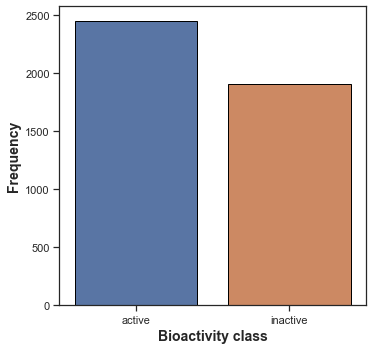

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **MW与LogP的散点图**

从MW与LogP的散点图中可以看出，这两个生物活性类别跨越了类似的化学空间。

/Users/xinyili/opt/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:1254: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/Users/xinyili/opt/anaconda3/lib/python3.9/site-packages/matplotlib/colors.py:1254: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


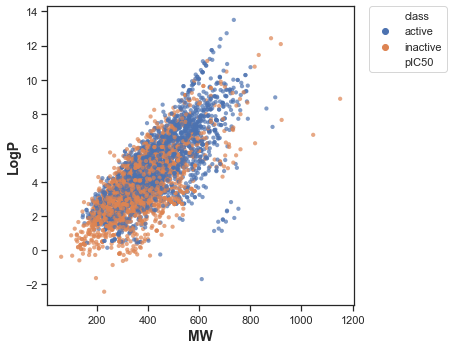

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### **箱型图**

#### **pIC50**

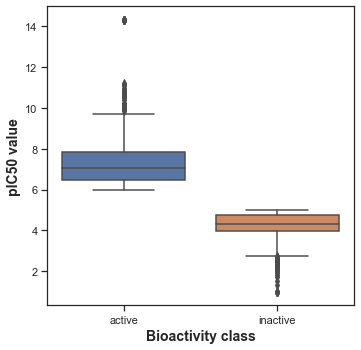

In [70]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**统计分析｜曼-惠特尼U检验**

检查活跃组和非活跃组之间的pIC50值是否有显著差异

In [71]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [72]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4691505.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

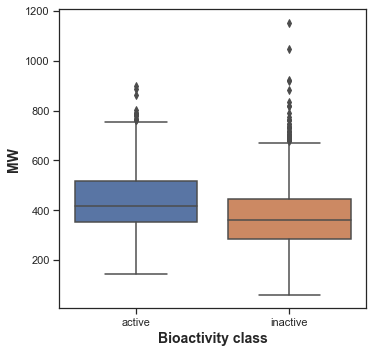

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

检查活跃组和不活跃组之间的MW值是否有显著差异

In [74]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3058287.5,1.232200e-66,0.05,Different distribution (reject H0)


#### **LogP**

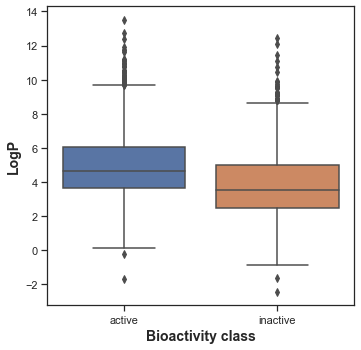

In [75]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

检查活跃组和非活跃组之间的LogP值是否有显著差异

In [76]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3140805.5,1.663478e-82,0.05,Different distribution (reject H0)


#### **NumHDonors**

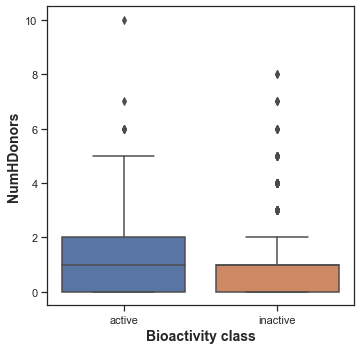

In [77]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

检查活跃组和不活跃组之间的numHDonors是否有显著差异

In [78]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2688100.5,3.809342e-18,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

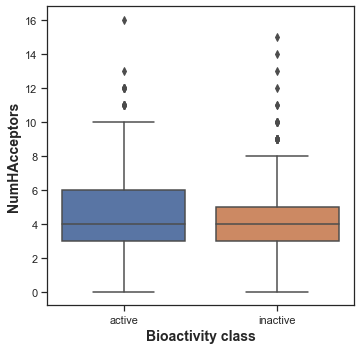

In [79]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

检查活跃组和不活跃组之间的numHAcceptors是否有显著差异

In [80]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2566325.5,5.985682e-08,0.05,Different distribution (reject H0)


#### **解释统计结果**

###### **pIC50值**

**活性**和**非活性**显示出**统计学上的显著差异**，这是可以预期的，因为阈值（"IC50 < 1,000 nM = "actives"，而IC50 > 10,000 nM = "Inactives"，相当于 "pIC50 > 6 = "actives"和pIC50 < 5 = "Inactives"）被用来定义活性和非活性。

###### **Lipinski的指标**。

所有4个Lipinski指标在**活性**和**非活性**之间都表现出**统计学上的显著差异**。

In [81]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: descriptor_list.csv (deflated 95%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 81%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
